# Gráficos

In [6]:
#pip install matplotlib

In [41]:
import sqlite3
import datetime
import matplotlib.pyplot as plt
import os
#Comando para gerar o grafico no proprio Jupyter senão cria em outra aba
%matplotlib notebook

#Criando o banco
conn = sqlite3.connect('clientes.db')
c = conn.cursor()

#Funções

#Create table
def create_table():
    c.execute('CREATE TABLE IF NOT EXISTS clientes (id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, '\
              'nome TEXT, dt_nasc TEXT, cpf VARCHAR(11))')

#Função para inserir dados
def data_insert(client):
    c.execute('INSERT INTO clientes (nome,dt_nasc,cpf) VALUES '\
              '(?,?,?)',(client['name'],client['dt_nasc'],client['cpf']))
    conn.commit()

def data_delete(id):
    c.execute('DELETE FROM clientes WHERE id = ?',(id))
    conn.commit()

def data_alter(client):
    c.execute('UPDATE clientes SET nome = ?, dt_nasc = ?, cpf = ? WHERE id = ?',(client['name'],client['dt_nasc'],client['cpf'],client['id']))
    conn.commit()

def data_select():
    c.execute('SELECT * FROM clientes')
    return c.fetchall()

def exibir_grafico():
    c.execute('SELECT id,cpf FROM clientes')
    ids = []
    valores = []
    dados = c.fetchall()
    for linha in dados:
        ids.append(linha[0])
        valores.append(int(linha[1]))
        
    plt.bar(ids,valores)
    plt.show()
    
create_table()

Digite -1 para sair
Digite 1 para cadastrar cliente
Digite 2 para remover cliente
Digite 3 para alterar cliente
Digite 4 para listar clientes
Digite a opção desejada: 4
(1, 'Nicola', '1988-02-11', '25')
(2, 'Stephanie', '1990-04-10', '26')


<IPython.core.display.Javascript object>


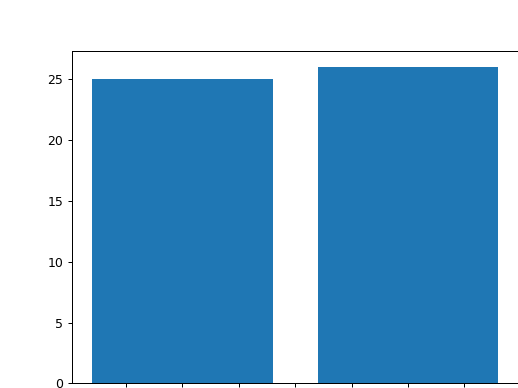

Digite -1 para sair
Digite 1 para cadastrar cliente
Digite 2 para remover cliente
Digite 3 para alterar cliente
Digite 4 para listar clientes
Digite a opção desejada: -1


In [43]:
#Cadastrando clientes

opt = 0

while(opt >= 0):
    
    print('Digite -1 para sair')
    print('Digite 1 para cadastrar cliente')
    print('Digite 2 para remover cliente')
    print('Digite 3 para alterar cliente')
    print('Digite 4 para listar clientes')
    opt = int(input('Digite a opção desejada: '))
    
    if(opt == 1):
        newClient = {}
        newClient['name'] = input('Digite o nome: ')
        newClient['dt_nasc'] = input('Digite a data de nascimento: ')
        newClient['cpf'] = input('Digite o cpf: ')
        data_insert(newClient)
        data_select()
    
    elif(opt == 2):
        remClient_id = input('Digite o id: ')
        data_delete(remClient_id)
        data_select()
        
    elif(opt == 3):
        altClient = {}
        altClient['id'] = input('Digite o id para alteração: ')
        altClient['name'] = input('Digite o nome: ')
        altClient['dt_nasc'] = input('Digite a data de nascimento: ')
        altClient['cpf'] = input('Digite o cpf: ')
        data_alter(altClient)
        data_select()
    
    elif(opt == 4):
        for dt in data_select():
            print(dt)
        
        exibir_grafico()
            
    elif(opt == -1):
        break
        
    else:
        print('Comando não identificado')
